In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
from sklearn.decomposition import PCA
import joblib

2024-05-17 16:55:56.871633: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-17 16:55:57.302819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Load the PCA model
pca = joblib.load('pca_model.pkl')

In [79]:
# Load the image
image_path = 'trial/Image__2024-05-17__16-53-31.jpg'  # replace with your image path
img = cv2.imread(image_path)

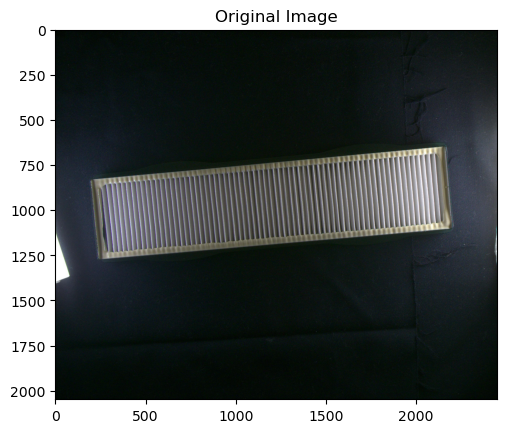

In [80]:
# Visualize the original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

In [81]:
# Resize the image
img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LANCZOS4)

# Normalize the image
img = img / 255.0

# Reshape the image for PCA
img_reshaped = img.reshape(1, -1)

# Apply PCA
img_pca = pca.transform(img_reshaped)

In [82]:
# To visualize the image after PCA, we need to inverse transform it
img_inverse = pca.inverse_transform(img_pca)

# Reshape the inverse transformed image
img_inverse_reshaped = img_inverse.reshape(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


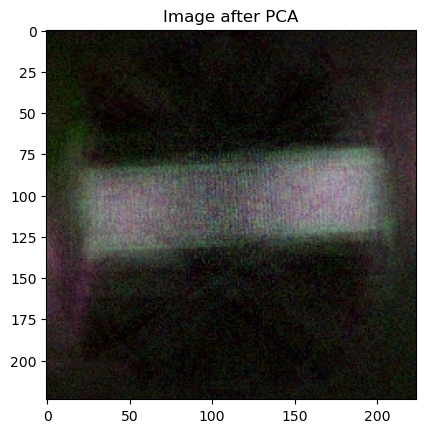

In [83]:
# Visualize the image after PCA
plt.imshow(img_inverse_reshaped)
plt.title('Image after PCA')
plt.show()

In [84]:
# Load the trained model
model = tf.keras.models.load_model('best_model.h5')

# Reshape the PCA-transformed image for prediction
img_pca_reshaped = img_pca.reshape(1, -1)

In [85]:
# Use the model to predict the class of the image
prediction = model.predict(img_pca_reshaped)
print (prediction)

1/1 [==============================] - 0s 138ms/step
[[1.]]


In [86]:
# The prediction is a probability. If it's greater than 0.5, we classify it as class 1, otherwise it's class 0.
predicted_class = (prediction > 0.5).astype("int32")

print("Predicted class:", predicted_class)

Predicted class: [[1]]


In [87]:
if predicted_class[0][0] == 0:
    print("Correct Filter")
else:
    print("Faulty Filter")

Faulty Filter
